In [11]:
# Reading the cleaned numeric titanic survival data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [13]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=30 , epochs=20, verbose=1)


Epoch 1/20


2023-02-18 07:42:28.177402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 46ms/step - loss: 0.6917 - accuracy: 0.6308
Epoch 2/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6879 - accuracy: 0.6292
Epoch 3/20
21/21 [==============================] - 0s 17ms/step - loss: 0.6806 - accuracy: 0.6292
Epoch 4/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6672 - accuracy: 0.6372
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.7207
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.7592
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5729 - accuracy: 0.7817
Epoch 8/20
21/21 [==============================] - 0s 10ms/step - loss: 0.5393 - accuracy: 0.7994
Epoch 9/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5150 - accuracy: 0.8058
Epoch 10/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4956 - accuracy: 0.8170
Epoch 11/20
21/21 [=====

KeyboardInterrupt: 

In [6]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

2023-02-17 15:45:36.662018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.80738365650177


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:45:40.826825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8170144557952881


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:45:48.246802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.841091513633728


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:46:23.174830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8426966071128845


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:47:30.592351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.6292135119438171


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:47:33.125631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8234350085258484


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:47:37.035712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.8378812074661255


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:47:55.645498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8555377125740051


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:48:32.506733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.8009631037712097


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:48:34.489797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.812199056148529


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:48:37.296417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8314606547355652


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:48:49.240487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.841091513633728


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:49:13.927116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.7399678826332092


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:49:15.382297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8089887499809265


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:49:17.729446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.8378812074661255


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
2023-02-17 15:49:27.695034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.8362760543823242


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/3836184913.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


  TrialNumber             Parameters  Accuracy
0           8  batch_size10-epoch100  0.855538


<Axes: xlabel='Parameters'>

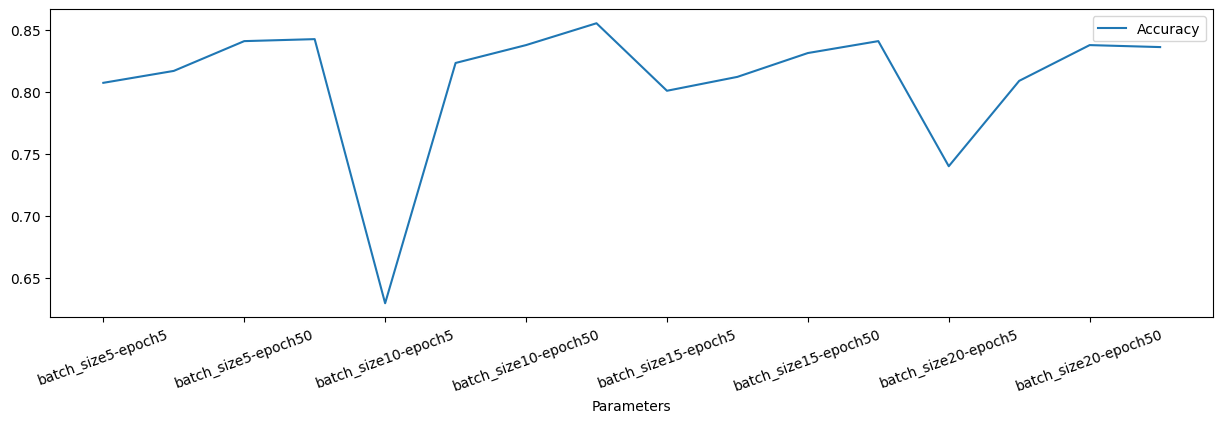

In [7]:
# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [8]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4464 - accuracy: 0.8074
Epoch 2/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4410 - accuracy: 0.8138
Epoch 3/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4369 - accuracy: 0.8090
Epoch 4/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4339 - accuracy: 0.8122
Epoch 5/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4316 - accuracy: 0.8042
Epoch 6/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4278 - accuracy: 0.8026
Epoch 7/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4260 - accuracy: 0.8106
Epoch 8/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4243 - accuracy: 0.8122
Epoch 9/100
125/125 [==============================] - 1s 8ms/step - loss: 0.4250 - accuracy: 0.8106
Epoch 10/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4211 - accura

In [33]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

9/9 [==============================] - 0s 9ms/step
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0     3.0  1.0  23.0    1.0    1.0  15.2458         1.0         0.0   
1     2.0  1.0  31.0    0.0    0.0  10.5000         0.0         0.0   
2     3.0  1.0  20.0    0.0    0.0   7.9250         0.0         0.0   
3     2.0  0.0   6.0    0.0    1.0  33.0000         0.0         0.0   
4     3.0  0.0  14.0    1.0    0.0  11.2417         1.0         0.0   

   Embarked_S  Survival  PredictedSurvivalProb  PredictedSurvival  
0         0.0         1               0.334473                  0  
1         1.0         0               0.135435                  0  
2         1.0         0               0.113547                  0  
3         1.0         1               0.850857                  1  
4         0.0         1               0.730773                  1  

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           0 

2023-02-17 18:43:09.162413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
from sklearn.metrics import roc_auc_score, roc_curve,auc
mock_auc = roc_auc_score(TestingData['Survival'], TestingData['PredictedSurvival'])
print('AUC of the ANN on the mock_test set is',mock_auc)

AUC of the ANN on the mock_test set is 0.7672290124519425


In [10]:
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=9, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

########################################

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }

# Creating the classifier ANN
classifierModel=KerasClassifier(make_classification_ann, verbose=0)

########################################

# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

########################################

# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

########################################

# printing the best parameters
print('\n#### Best hyperparamters ####')
grid_search.best_params_

Epoch 1/10


/var/folders/7n/r8rrh9ss6q9b_lyhlmx1x_hw0000gn/T/ipykernel_12012/1686040440.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifierModel=KerasClassifier(make_classification_ann, verbose=0)
2023-02-17 16:10:23.084140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 12ms/step - loss: 0.6909 - accuracy: 0.6185
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6808 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6540 - accuracy: 0.6265
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.6265
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5651 - accuracy: 0.6265
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5408 - accuracy: 0.6265
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5284 - accuracy: 0.6265
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.6265
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5155 - accuracy: 0.6265
Epoch 10/10
4/4 [==============================] - 0s 11ms/step
Epoch 1/10


2023-02-17 16:10:27.437484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 15s - loss: 0.6931 - accuracy: 0.5000

2023-02-17 16:10:27.698463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 9ms/step - loss: 0.6904 - accuracy: 0.6325
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6818 - accuracy: 0.6365
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6634 - accuracy: 0.6365
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6307 - accuracy: 0.6365
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5904 - accuracy: 0.6847
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.7289
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5350 - accuracy: 0.7831
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5196 - accuracy: 0.7892
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.7952
Epoch 10/10
4/4 [==============================] - 0s 6ms/step
Epoch 1/10


2023-02-17 16:10:31.458153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 14s - loss: 0.6932 - accuracy: 0.3000

2023-02-17 16:10:31.666121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 9ms/step - loss: 0.6913 - accuracy: 0.6185
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6810 - accuracy: 0.6265
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6650 - accuracy: 0.6647
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6337 - accuracy: 0.7791
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5902 - accuracy: 0.8052
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5465 - accuracy: 0.7932
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5101 - accuracy: 0.7932
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4838 - accuracy: 0.7932
Epoch 10/10
4/4 [==============================] - 0s 6ms/step
Epoch 1/10


2023-02-17 16:10:35.472093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 15s - loss: 0.6932 - accuracy: 0.4000

2023-02-17 16:10:35.693194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 10ms/step - loss: 0.6908 - accuracy: 0.6313
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.6373
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6695 - accuracy: 0.6373
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6387 - accuracy: 0.6693
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5930 - accuracy: 0.7876
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5449 - accuracy: 0.8277
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5053 - accuracy: 0.8297
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4800 - accuracy: 0.8257
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4631 - accuracy: 0.8216
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:10:39.522334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 15s - loss: 0.6932 - accuracy: 0.4000

2023-02-17 16:10:39.745032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 10ms/step - loss: 0.6910 - accuracy: 0.6132
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6870 - accuracy: 0.6192
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6798 - accuracy: 0.6673
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6659 - accuracy: 0.7615
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6401 - accuracy: 0.7715
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6040 - accuracy: 0.7756
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5627 - accuracy: 0.7756
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7856
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4970 - accuracy: 0.7916
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
Epoch 1/20


2023-02-17 16:10:43.664625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 15s - loss: 0.6932 - accuracy: 0.1000

2023-02-17 16:10:43.896425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 10ms/step - loss: 0.6911 - accuracy: 0.6124
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.6265
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6661 - accuracy: 0.6265
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6240 - accuracy: 0.7028
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5657 - accuracy: 0.7831
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5145 - accuracy: 0.8092
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4806 - accuracy: 0.8153
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4589 - accuracy: 0.8092
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8032
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4371 - accuracy: 0.8072
Epoch 11/20
50/50 [==========

2023-02-17 16:10:51.181247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 14s - loss: 0.6931 - accuracy: 0.8000

2023-02-17 16:10:51.389859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 9ms/step - loss: 0.6902 - accuracy: 0.6426
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6818 - accuracy: 0.6365
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6638 - accuracy: 0.6747
Epoch 4/20
50/50 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.7289
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.5838 - accuracy: 0.7892
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5414 - accuracy: 0.7871
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5140 - accuracy: 0.7932
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.7952
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.7952
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4828 - accuracy: 0.7912
Epoch 11/20
50/50 [===========

2023-02-17 16:10:58.535401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 14s - loss: 0.6931 - accuracy: 0.7000

2023-02-17 16:10:58.748314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 10ms/step - loss: 0.6905 - accuracy: 0.6245
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.6265
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6578 - accuracy: 0.6265
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6150 - accuracy: 0.6265
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5748 - accuracy: 0.6265
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5514 - accuracy: 0.6265
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5390 - accuracy: 0.6265
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5311 - accuracy: 0.6265
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5261 - accuracy: 0.6265
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5212 - accuracy: 0.6988
Epoch 11/20
50/50 [==========

2023-02-17 16:11:06.432030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:06.643022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 11ms/step - loss: 0.6906 - accuracy: 0.6192
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.6373
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.7134
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6082 - accuracy: 0.7936
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5483 - accuracy: 0.8277
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4988 - accuracy: 0.8277
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.8277
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.8277
Epoch 9/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.8277
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4344 - accuracy: 0.8337
Epoch 11/20
50/50 [==========

2023-02-17 16:11:14.180065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/50 [..............................] - ETA: 14s - loss: 0.6932 - accuracy: 0.5000

2023-02-17 16:11:14.404928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 11ms/step - loss: 0.6912 - accuracy: 0.6172
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.6192
Epoch 3/20
50/50 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.6313
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6492 - accuracy: 0.7635
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6132 - accuracy: 0.7876
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5716 - accuracy: 0.7936
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.5348 - accuracy: 0.7916
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5073 - accuracy: 0.7876
Epoch 9/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4900 - accuracy: 0.7856
Epoch 10/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.7876
Epoch 11/20
50/50 [=========

2023-02-17 16:11:22.315386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:22.556067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 17ms/step - loss: 0.6920 - accuracy: 0.6104
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6861 - accuracy: 0.6265
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.6265
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6719 - accuracy: 0.6426
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6584 - accuracy: 0.7149
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6394 - accuracy: 0.7651
Epoch 8/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6157 - accuracy: 0.8092
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5896 - accuracy: 0.8032
Epoch 10/10
4/4 [==============================] - 0s 6ms/step
Epoch 1/10


2023-02-17 16:11:25.069377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/25 [>.............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.6500

2023-02-17 16:11:25.292098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.6917 - accuracy: 0.6386
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.6365
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.6365
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6739 - accuracy: 0.6365
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6592 - accuracy: 0.6365
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6390 - accuracy: 0.6365
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6167 - accuracy: 0.6365
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5945 - accuracy: 0.6446
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5759 - accuracy: 0.6928
Epoch 10/10
4/4 [==============================] - 0s 10ms/step
Epoch 1/10


2023-02-17 16:11:27.529652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:27.748426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.6922 - accuracy: 0.6004
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.6265
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.6285
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6673 - accuracy: 0.7088
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.7530
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6287 - accuracy: 0.7871
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6033 - accuracy: 0.7992
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5761 - accuracy: 0.8032
Epoch 10/10
4/4 [==============================] - 0s 8ms/step
Epoch 1/10


2023-02-17 16:11:30.039605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:30.258391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 17ms/step - loss: 0.6918 - accuracy: 0.6253
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6889 - accuracy: 0.6373
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6855 - accuracy: 0.6373
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6806 - accuracy: 0.6373
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6730 - accuracy: 0.6373
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6620 - accuracy: 0.6373
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6469 - accuracy: 0.6373
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6267 - accuracy: 0.6373
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6040 - accuracy: 0.6373
Epoch 10/10
4/4 [==============================] - 0s 10ms/step
Epoch 1/10


2023-02-17 16:11:32.611138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:32.848151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.6919 - accuracy: 0.6192
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.6192
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6861 - accuracy: 0.6192
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.6192
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6691 - accuracy: 0.6192
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6483 - accuracy: 0.6253
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6193 - accuracy: 0.6994
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5882 - accuracy: 0.7375
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.7715
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
Epoch 1/20


2023-02-17 16:11:35.096821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:35.304059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 16ms/step - loss: 0.6920 - accuracy: 0.6225
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6656 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6460 - accuracy: 0.6265
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6191 - accuracy: 0.6285
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5891 - accuracy: 0.7390
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5586 - accuracy: 0.7932
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5290 - accuracy: 0.8133
Epoch 11/20
25/25 [==========

2023-02-17 16:11:39.400710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:39.621746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 16ms/step - loss: 0.6916 - accuracy: 0.6165
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.6365
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6800 - accuracy: 0.6365
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6652 - accuracy: 0.6365
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6408 - accuracy: 0.6365
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6149 - accuracy: 0.6365
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.6365
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5793 - accuracy: 0.6365
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5709 - accuracy: 0.6365
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5640 - accuracy: 0.6365
Epoch 11/20
25/25 [==========

2023-02-17 16:11:43.731983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:43.957117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 18ms/step - loss: 0.6920 - accuracy: 0.6145
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6845 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6764 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6615 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6403 - accuracy: 0.6265
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6139 - accuracy: 0.6285
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5863 - accuracy: 0.6566
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5618 - accuracy: 0.7249
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5423 - accuracy: 0.7550
Epoch 11/20
25/25 [==========

2023-02-17 16:11:48.332769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:48.564451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.6918 - accuracy: 0.6273
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.6373
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.6373
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6784 - accuracy: 0.6393
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6680 - accuracy: 0.7154
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6525 - accuracy: 0.7475
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6317 - accuracy: 0.7996
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6047 - accuracy: 0.8257
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.8277
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5451 - accuracy: 0.8297
Epoch 11/20
25/25 [==========

2023-02-17 16:11:52.535495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:52.773724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.6918 - accuracy: 0.6172
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6887 - accuracy: 0.6192
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.6192
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6719 - accuracy: 0.6192
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6192
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6284 - accuracy: 0.6192
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6031 - accuracy: 0.6192
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5829 - accuracy: 0.6192
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5687 - accuracy: 0.6192
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5599 - accuracy: 0.6192
Epoch 11/20
25/25 [=========

2023-02-17 16:11:56.824212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:57.049292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 21ms/step - loss: 0.6922 - accuracy: 0.6245
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.6285
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6655 - accuracy: 0.6406
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6787
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6337 - accuracy: 0.7329
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6122 - accuracy: 0.7631
Epoch 10/10
4/4 [==============================] - 0s 10ms/step
Epoch 1/10


2023-02-17 16:11:58.818081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:11:59.036084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 22ms/step - loss: 0.6921 - accuracy: 0.6285
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.6365
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.6365
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.6365
Epoch 5/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.6365
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6772 - accuracy: 0.6365
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6365
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.6365
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6365
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:12:00.823092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:01.573433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 17ms/step - loss: 0.6920 - accuracy: 0.6265
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6893 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6800 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6265
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6588 - accuracy: 0.6265
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6419 - accuracy: 0.6265
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6222 - accuracy: 0.6265
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6019 - accuracy: 0.6265
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
Epoch 1/10


2023-02-17 16:12:03.365176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:03.591296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 20ms/step - loss: 0.6920 - accuracy: 0.6313
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6373
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.6373
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.6373
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6795 - accuracy: 0.6373
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6729 - accuracy: 0.6373
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.6373
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6492 - accuracy: 0.6373
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6373
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Epoch 1/10


2023-02-17 16:12:05.288225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:05.504667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 17ms/step - loss: 0.6923 - accuracy: 0.6192
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6192
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6875 - accuracy: 0.6192
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6832 - accuracy: 0.6192
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6757 - accuracy: 0.6192
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6637 - accuracy: 0.6192
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6192
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6241 - accuracy: 0.6192
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6024 - accuracy: 0.6192
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/20


2023-02-17 16:12:07.401781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:07.659364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 20ms/step - loss: 0.6923 - accuracy: 0.6205
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.6265
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.6265
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.6365
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6641 - accuracy: 0.7470
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.8173
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6334 - accuracy: 0.8092
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6135 - accuracy: 0.8193
Epoch 11/20
17/17 [==========

2023-02-17 16:12:10.744128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/17 [>.............................] - ETA: 5s - loss: 0.6932 - accuracy: 0.4333

2023-02-17 16:12:11.001126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 19ms/step - loss: 0.6923 - accuracy: 0.6285
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.6365
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6876 - accuracy: 0.6365
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.6365
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6365
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6365
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.6386
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.6546
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6259 - accuracy: 0.6888
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6062 - accuracy: 0.7068
Epoch 11/20
17/17 [==========

2023-02-17 16:12:13.941170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:14.176155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 22ms/step - loss: 0.6923 - accuracy: 0.6064
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.6265
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6817 - accuracy: 0.6265
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6767 - accuracy: 0.6265
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6696 - accuracy: 0.6265
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6608 - accuracy: 0.6305
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6490 - accuracy: 0.6908
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6352 - accuracy: 0.7390
Epoch 11/20
17/17 [==========

2023-02-17 16:12:17.087951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:17.311991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 23ms/step - loss: 0.6922 - accuracy: 0.6232
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.6373
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.6373
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6858 - accuracy: 0.6373
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.6373
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6783 - accuracy: 0.6373
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.6373
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6648 - accuracy: 0.6373
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.6373
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6430 - accuracy: 0.6373
Epoch 11/20
17/17 [==========

2023-02-17 16:12:20.517083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:20.775497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 23ms/step - loss: 0.6924 - accuracy: 0.6172
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.6192
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.6192
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6847 - accuracy: 0.6192
Epoch 5/20
17/17 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.6192
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6703 - accuracy: 0.6192
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6572 - accuracy: 0.6192
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.6192
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6200 - accuracy: 0.6192
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5995 - accuracy: 0.6232
Epoch 11/20
17/17 [========

2023-02-17 16:12:23.909096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:24.154499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 0.6893 - accuracy: 0.6265
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6788 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6618 - accuracy: 0.6265
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6367 - accuracy: 0.6265
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6265
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5819 - accuracy: 0.6265
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5616 - accuracy: 0.6265
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5464 - accuracy: 0.6265
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.6265
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:12:28.960232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:29.198606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 0.6882 - accuracy: 0.6365
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6746 - accuracy: 0.6365
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6530 - accuracy: 0.6365
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6273 - accuracy: 0.6365
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6004 - accuracy: 0.6365
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5781 - accuracy: 0.6365
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5640 - accuracy: 0.6365
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5546 - accuracy: 0.6365
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5491 - accuracy: 0.6365
Epoch 10/10
4/4 [==============================] - 0s 8ms/step
Epoch 1/10


2023-02-17 16:12:33.863991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:34.097944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6900 - accuracy: 0.6165
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.6265
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6558 - accuracy: 0.6265
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.6265
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6092 - accuracy: 0.6345
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5837 - accuracy: 0.7129
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5581 - accuracy: 0.7430
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.7631
Epoch 10/10
4/4 [==============================] - 0s 8ms/step
Epoch 1/10


2023-02-17 16:12:38.752819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:38.984762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 0.6891 - accuracy: 0.6353
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.6373
Epoch 3/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.6373
Epoch 4/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6419 - accuracy: 0.6373
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6155 - accuracy: 0.6994
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5862 - accuracy: 0.7375
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5594 - accuracy: 0.7715
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5336 - accuracy: 0.7876
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5120 - accuracy: 0.8176
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
Epoch 1/10


2023-02-17 16:12:43.753594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:43.989314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 13ms/step - loss: 0.6902 - accuracy: 0.6092
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6833 - accuracy: 0.6192
Epoch 3/10
50/50 [==============================] - 1s 12ms/step - loss: 0.6719 - accuracy: 0.6192
Epoch 4/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6551 - accuracy: 0.6212
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6350 - accuracy: 0.6794
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6106 - accuracy: 0.7355
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5855 - accuracy: 0.7715
Epoch 8/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.7896
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.8076
Epoch 10/10
4/4 [==============================] - 0s 11ms/step
Epoch 1/20


2023-02-17 16:12:49.572929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:49.854322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6912 - accuracy: 0.6165
Epoch 2/20
50/50 [==============================] - 1s 10ms/step - loss: 0.6861 - accuracy: 0.6305
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6784 - accuracy: 0.6807
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6671 - accuracy: 0.7590
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6516 - accuracy: 0.7871
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.7972
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6158 - accuracy: 0.7952
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5953 - accuracy: 0.7952
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5779 - accuracy: 0.7952
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5646 - accuracy: 0.7992
Epoch 11/20
50/50 [=========

2023-02-17 16:12:58.820006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:12:59.064679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6903 - accuracy: 0.6265
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.6365
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6780 - accuracy: 0.6365
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.6365
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6574 - accuracy: 0.6365
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6438 - accuracy: 0.6365
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6272 - accuracy: 0.6767
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6071 - accuracy: 0.7229
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.7390
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5657 - accuracy: 0.7731
Epoch 11/20
50/50 [==========

2023-02-17 16:13:07.617936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:07.872744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 13ms/step - loss: 0.6908 - accuracy: 0.6205
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.6265
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.6265
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.6265
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6590 - accuracy: 0.6265
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.6265
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6250 - accuracy: 0.6265
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6049 - accuracy: 0.6265
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5855 - accuracy: 0.6265
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5684 - accuracy: 0.6265
Epoch 11/20
50/50 [==========

2023-02-17 16:13:16.260297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:16.501606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 0.6895 - accuracy: 0.6373
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.6373
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.6373
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.6373
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6085 - accuracy: 0.6834
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5775 - accuracy: 0.7234
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5511 - accuracy: 0.7575
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5301 - accuracy: 0.7856
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5129 - accuracy: 0.8156
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4984 - accuracy: 0.8257
Epoch 11/20
50/50 [==========

2023-02-17 16:13:24.956545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:25.189933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.6052
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.6192
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6726 - accuracy: 0.6192
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6574 - accuracy: 0.6192
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.6212
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6151 - accuracy: 0.6513
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5926 - accuracy: 0.7275
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5723 - accuracy: 0.7756
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5542 - accuracy: 0.7916
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5386 - accuracy: 0.7996
Epoch 11/20
50/50 [==========

2023-02-17 16:13:33.610998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:33.855178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6912 - accuracy: 0.6165
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.6305
Epoch 4/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6796 - accuracy: 0.6867
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.7390
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6642 - accuracy: 0.7972
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6544 - accuracy: 0.8153
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6437 - accuracy: 0.8032
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6320 - accuracy: 0.7992
Epoch 10/10
4/4 [==============================] - 0s 8ms/step
Epoch 1/10


2023-02-17 16:13:36.741512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:36.983663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 24ms/step - loss: 0.6914 - accuracy: 0.6245
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.6365
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.6365
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6793 - accuracy: 0.6365
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.6365
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6673 - accuracy: 0.6406
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.6446
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.6747
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6413 - accuracy: 0.6908
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:13:40.015094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:40.255169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 27ms/step - loss: 0.6912 - accuracy: 0.6104
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6871 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6824 - accuracy: 0.6265
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6764 - accuracy: 0.6265
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.6265
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.6285
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.6325
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6370 - accuracy: 0.6667
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6240 - accuracy: 0.7249
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:13:43.335806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:43.586308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 26ms/step - loss: 0.6912 - accuracy: 0.6232
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.6373
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6833 - accuracy: 0.6373
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6783 - accuracy: 0.6373
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.6373
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.6373
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.6373
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6476 - accuracy: 0.6393
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6362 - accuracy: 0.6433
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:13:46.532909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:46.773131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6913 - accuracy: 0.6132
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.6192
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.6192
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6789 - accuracy: 0.6192
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6730 - accuracy: 0.6192
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6655 - accuracy: 0.6192
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.6192
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6467 - accuracy: 0.6192
Epoch 9/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6361 - accuracy: 0.6192
Epoch 10/10
4/4 [==============================] - 0s 11ms/step
Epoch 1/20


2023-02-17 16:13:49.976852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:50.927728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 27ms/step - loss: 0.6908 - accuracy: 0.6185
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6866 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6812 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6660 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6558 - accuracy: 0.6265
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6439 - accuracy: 0.6265
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.6265
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6171 - accuracy: 0.6285
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6013 - accuracy: 0.6285
Epoch 11/20
25/25 [=========

2023-02-17 16:13:56.052057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:13:56.298197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6901 - accuracy: 0.6426
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.6365
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6790 - accuracy: 0.6365
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6708 - accuracy: 0.6386
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6612 - accuracy: 0.6386
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6498 - accuracy: 0.6426
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6361 - accuracy: 0.6667
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6213 - accuracy: 0.7068
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6064 - accuracy: 0.7169
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5916 - accuracy: 0.7349
Epoch 11/20
25/25 [========

2023-02-17 16:14:01.110769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:01.352779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6910 - accuracy: 0.6325
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6790 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6747 - accuracy: 0.6285
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6698 - accuracy: 0.6767
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6640 - accuracy: 0.7249
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6575 - accuracy: 0.7470
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6500 - accuracy: 0.7791
Epoch 11/20
25/25 [=========

2023-02-17 16:14:06.314820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:06.562923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6905 - accuracy: 0.6333
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.6373
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6799 - accuracy: 0.6373
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6724 - accuracy: 0.6373
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6629 - accuracy: 0.6413
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6514 - accuracy: 0.6433
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.6814
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6236 - accuracy: 0.7154
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7315
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5921 - accuracy: 0.7455
Epoch 11/20
25/25 [========

2023-02-17 16:14:11.548824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:11.813650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6910 - accuracy: 0.6192
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.6192
Epoch 3/20
25/25 [==============================] - 0s 13ms/step - loss: 0.6810 - accuracy: 0.6192
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6736 - accuracy: 0.6192
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6641 - accuracy: 0.6192
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6536 - accuracy: 0.6192
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6425 - accuracy: 0.6192
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6310 - accuracy: 0.6192
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6195 - accuracy: 0.6192
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6089 - accuracy: 0.6192
Epoch 11/20
25/25 [=========

2023-02-17 16:14:16.683694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:16.917078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 36ms/step - loss: 0.6909 - accuracy: 0.6365
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6877 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 15ms/step - loss: 0.6838 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6792 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6737 - accuracy: 0.6305
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6673 - accuracy: 0.6386
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6595 - accuracy: 0.6606
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6509 - accuracy: 0.6928
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.7229
Epoch 10/10
4/4 [==============================] - 0s 8ms/step
Epoch 1/10


2023-02-17 16:14:19.312313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:19.555391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 36ms/step - loss: 0.6913 - accuracy: 0.6365
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6872 - accuracy: 0.6365
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6824 - accuracy: 0.6365
Epoch 4/10
17/17 [==============================] - 0s 15ms/step - loss: 0.6761 - accuracy: 0.6365
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.6365
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6596 - accuracy: 0.6365
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.6365
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6390 - accuracy: 0.6365
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6278 - accuracy: 0.6365
Epoch 10/10
4/4 [==============================] - 0s 14ms/step
Epoch 1/10


2023-02-17 16:14:21.919242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:22.183010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 39ms/step - loss: 0.6919 - accuracy: 0.6104
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6895 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.6285
Epoch 5/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.6285
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.6546
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6694 - accuracy: 0.6968
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.7229
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6562 - accuracy: 0.7309
Epoch 10/10
4/4 [==============================] - 0s 11ms/step
Epoch 1/10


2023-02-17 16:14:24.733621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:25.002883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 37ms/step - loss: 0.6914 - accuracy: 0.6373
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6877 - accuracy: 0.6373
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.6373
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6765 - accuracy: 0.6373
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6687 - accuracy: 0.6373
Epoch 6/10
17/17 [==============================] - 0s 14ms/step - loss: 0.6599 - accuracy: 0.6373
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6492 - accuracy: 0.6373
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6381 - accuracy: 0.6373
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6268 - accuracy: 0.6373
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:14:27.518939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:27.798074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 44ms/step - loss: 0.6915 - accuracy: 0.6212
Epoch 2/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6889 - accuracy: 0.6192
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6857 - accuracy: 0.6192
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.6192
Epoch 5/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6769 - accuracy: 0.6192
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.6192
Epoch 7/10
17/17 [==============================] - 0s 15ms/step - loss: 0.6646 - accuracy: 0.6192
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6575 - accuracy: 0.6192
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6192
Epoch 10/10
4/4 [==============================] - 0s 11ms/step
Epoch 1/20


2023-02-17 16:14:30.491636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:30.748623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 46ms/step - loss: 0.6917 - accuracy: 0.6124
Epoch 2/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6880 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6774 - accuracy: 0.6265
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6265
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6614 - accuracy: 0.6265
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.6265
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6401 - accuracy: 0.6265
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6280 - accuracy: 0.6265
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6159 - accuracy: 0.6265
Epoch 11/20
17/17 [========

2023-02-17 16:14:34.671840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:35.592573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 37ms/step - loss: 0.6914 - accuracy: 0.6365
Epoch 2/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6880 - accuracy: 0.6365
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6845 - accuracy: 0.6365
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6801 - accuracy: 0.6365
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.6365
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6690 - accuracy: 0.6365
Epoch 7/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6619 - accuracy: 0.6365
Epoch 8/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6542 - accuracy: 0.6365
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6455 - accuracy: 0.6365
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6365 - accuracy: 0.6365
Epoch 11/20
17/17 [=======

2023-02-17 16:14:39.555776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:39.801504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 36ms/step - loss: 0.6919 - accuracy: 0.5984
Epoch 2/20
17/17 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 12ms/step - loss: 0.6821 - accuracy: 0.6265
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.6265
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.6265
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6648 - accuracy: 0.6265
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6571 - accuracy: 0.6265
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6488 - accuracy: 0.6265
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6397 - accuracy: 0.6265
Epoch 11/20
17/17 [=======

2023-02-17 16:14:43.693171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:43.966263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 40ms/step - loss: 0.6915 - accuracy: 0.6273
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.6373
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6845 - accuracy: 0.6373
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6792 - accuracy: 0.6373
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6373
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6637 - accuracy: 0.6373
Epoch 7/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6538 - accuracy: 0.6373
Epoch 8/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6434 - accuracy: 0.6373
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6317 - accuracy: 0.6373
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6200 - accuracy: 0.6373
Epoch 11/20
17/17 [=========

2023-02-17 16:14:47.873641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:48.125276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 41ms/step - loss: 0.6915 - accuracy: 0.6232
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6889 - accuracy: 0.6192
Epoch 3/20
17/17 [==============================] - 0s 13ms/step - loss: 0.6860 - accuracy: 0.6192
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6825 - accuracy: 0.6192
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6784 - accuracy: 0.6192
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6735 - accuracy: 0.6192
Epoch 7/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6681 - accuracy: 0.6192
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6622 - accuracy: 0.6192
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6560 - accuracy: 0.6192
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6491 - accuracy: 0.6192
Epoch 11/20
17/17 [======

2023-02-17 16:14:52.140876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:52.381454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 18ms/step - loss: 0.6911 - accuracy: 0.6185
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.6627
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6375 - accuracy: 0.7992
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5592 - accuracy: 0.8092
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4821 - accuracy: 0.8092
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4452 - accuracy: 0.8072
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4310 - accuracy: 0.8112
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4225 - accuracy: 0.8112
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8112
Epoch 10/10
4/4 [==============================] - 0s 20ms/step
Epoch 1/10


2023-02-17 16:14:56.904567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:14:57.185654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6895 - accuracy: 0.6426
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.6365
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6135 - accuracy: 0.7169
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5529 - accuracy: 0.7731
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5176 - accuracy: 0.7932
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4963 - accuracy: 0.7992
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4857 - accuracy: 0.7932
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4800 - accuracy: 0.7932
Epoch 9/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.7912
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:15:01.452494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:01.694511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6908 - accuracy: 0.6265
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6533 - accuracy: 0.6586
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.7851
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5132 - accuracy: 0.7912
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.7912
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4543 - accuracy: 0.7932
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8052
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4386 - accuracy: 0.8112
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:15:06.087092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:06.358873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 21ms/step - loss: 0.6909 - accuracy: 0.6353
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.6373
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.6934
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5594 - accuracy: 0.7856
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5011 - accuracy: 0.8156
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.8297
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4515 - accuracy: 0.8317
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4408 - accuracy: 0.8317
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4336 - accuracy: 0.8417
Epoch 10/10
4/4 [==============================] - 0s 20ms/step
Epoch 1/10


2023-02-17 16:15:10.841772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:11.107030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6915 - accuracy: 0.5872
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.6192
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6159 - accuracy: 0.6754
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5574 - accuracy: 0.7595
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 0.7956
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5055 - accuracy: 0.8056
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.7976
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4796 - accuracy: 0.8036
Epoch 9/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.8016
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/20


2023-02-17 16:15:15.249280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:15.491167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6897 - accuracy: 0.6245
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6648 - accuracy: 0.6265
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5893 - accuracy: 0.7309
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5167 - accuracy: 0.8092
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4752 - accuracy: 0.8153
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.8213
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4373 - accuracy: 0.8092
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.8092
Epoch 9/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4244 - accuracy: 0.8112
Epoch 10/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4194 - accuracy: 0.8133
Epoch 11/20
50/50 [==========

2023-02-17 16:15:22.865843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:23.106352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 16ms/step - loss: 0.6906 - accuracy: 0.6305
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6776 - accuracy: 0.6365
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6329 - accuracy: 0.6606
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5686 - accuracy: 0.7570
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5263 - accuracy: 0.7892
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.5044 - accuracy: 0.7932
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4917 - accuracy: 0.7932
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4835 - accuracy: 0.7892
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.7972
Epoch 10/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4742 - accuracy: 0.7912
Epoch 11/20
50/50 [==========

2023-02-17 16:15:30.513766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:30.755502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 17ms/step - loss: 0.6902 - accuracy: 0.6225
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.6325
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.7390
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5326 - accuracy: 0.7892
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 0.8032
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.7972
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4435 - accuracy: 0.8012
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4387 - accuracy: 0.8092
Epoch 9/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4335 - accuracy: 0.8052
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4290 - accuracy: 0.8072
Epoch 11/20
50/50 [==========

2023-02-17 16:15:38.231532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:38.466583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6900 - accuracy: 0.6373
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6692 - accuracy: 0.6373
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6089 - accuracy: 0.7054
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 0.7695
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.8136
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.8257
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.8236
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 0.4432 - accuracy: 0.8337
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4356 - accuracy: 0.8357
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4300 - accuracy: 0.8337
Epoch 11/20
50/50 [==========

2023-02-17 16:15:45.858947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:46.800776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 17ms/step - loss: 0.6904 - accuracy: 0.6192
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6773 - accuracy: 0.6393
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6321 - accuracy: 0.7395
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5577 - accuracy: 0.7916
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5052 - accuracy: 0.7956
Epoch 6/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4844 - accuracy: 0.7896
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4717 - accuracy: 0.7976
Epoch 8/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4656 - accuracy: 0.7956
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4615 - accuracy: 0.8016
Epoch 10/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4582 - accuracy: 0.7996
Epoch 11/20
50/50 [==========

2023-02-17 16:15:54.783537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:55.035922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6915 - accuracy: 0.6245
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6696 - accuracy: 0.6265
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6358 - accuracy: 0.6265
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5899 - accuracy: 0.6305
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5483 - accuracy: 0.7329
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5199 - accuracy: 0.7871
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4990 - accuracy: 0.8092
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4819 - accuracy: 0.8193
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:15:57.689821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:15:57.924966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 24ms/step - loss: 0.6916 - accuracy: 0.6165
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.6365
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.6365
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6493 - accuracy: 0.6466
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6105 - accuracy: 0.6988
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5700 - accuracy: 0.7209
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.7510
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.7751
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.7871
Epoch 10/10
4/4 [==============================] - 0s 15ms/step
Epoch 1/10


2023-02-17 16:16:00.485546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:00.728138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 24ms/step - loss: 0.6912 - accuracy: 0.6365
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.6305
Epoch 3/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.7189
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6542 - accuracy: 0.7952
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6204 - accuracy: 0.7992
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5747 - accuracy: 0.8012
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7932
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4925 - accuracy: 0.7992
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4662 - accuracy: 0.8092
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/10


2023-02-17 16:16:03.355561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:03.592093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 30ms/step - loss: 0.6918 - accuracy: 0.6232
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6876 - accuracy: 0.6373
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6781 - accuracy: 0.6373
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.6413
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.6713
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5701 - accuracy: 0.7575
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.7876
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5090 - accuracy: 0.8236
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.4907 - accuracy: 0.8257
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:16:06.367430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:06.614203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 26ms/step - loss: 0.6919 - accuracy: 0.6232
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.6192
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6787 - accuracy: 0.6192
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6568 - accuracy: 0.6834
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.7315
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.7655
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5367 - accuracy: 0.7976
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7996
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4921 - accuracy: 0.7956
Epoch 10/10
4/4 [==============================] - 0s 9ms/step
Epoch 1/20


2023-02-17 16:16:09.239446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:09.455521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 25ms/step - loss: 0.6916 - accuracy: 0.6245
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6795 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6303 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.6546
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5465 - accuracy: 0.7751
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5161 - accuracy: 0.8092
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4964 - accuracy: 0.8293
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4788 - accuracy: 0.8353
Epoch 11/20
25/25 [==========

2023-02-17 16:16:13.716343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:13.950906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 27ms/step - loss: 0.6914 - accuracy: 0.6365
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.6365
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6747 - accuracy: 0.6386
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.6747
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.7209
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5689 - accuracy: 0.7771
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5329 - accuracy: 0.7912
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5077 - accuracy: 0.7871
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.7892
Epoch 10/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4851 - accuracy: 0.7972
Epoch 11/20
25/25 [==========

2023-02-17 16:16:18.382832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:18.683058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 28ms/step - loss: 0.6918 - accuracy: 0.6245
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6878 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6794 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6596 - accuracy: 0.6386
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6193 - accuracy: 0.7249
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5681 - accuracy: 0.7751
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5239 - accuracy: 0.7851
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7992
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4689 - accuracy: 0.8072
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4554 - accuracy: 0.8052
Epoch 11/20
25/25 [=========

2023-02-17 16:16:23.197229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:23.429290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 23ms/step - loss: 0.6923 - accuracy: 0.5932
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6897 - accuracy: 0.6373
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.6373
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.6413
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6710 - accuracy: 0.7134
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6495 - accuracy: 0.8156
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.8236
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.8196
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5387 - accuracy: 0.8216
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.8236
Epoch 11/20
25/25 [=========

2023-02-17 16:16:27.636636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:27.851024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 24ms/step - loss: 0.6918 - accuracy: 0.6192
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6888 - accuracy: 0.6192
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.6493
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6667 - accuracy: 0.7555
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.7756
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5992 - accuracy: 0.7796
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5577 - accuracy: 0.7695
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5212 - accuracy: 0.7756
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.7836
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4801 - accuracy: 0.7856
Epoch 11/20
25/25 [==========

2023-02-17 16:16:32.130150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:32.353856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 31ms/step - loss: 0.6921 - accuracy: 0.6165
Epoch 2/10
17/17 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6746 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6587 - accuracy: 0.6888
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6350 - accuracy: 0.7590
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6024 - accuracy: 0.7731
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5662 - accuracy: 0.7912
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.8153
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:16:34.519186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:34.762020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 40ms/step - loss: 0.6922 - accuracy: 0.6004
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6891 - accuracy: 0.6365
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6837 - accuracy: 0.6365
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6743 - accuracy: 0.6365
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.6365
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6335 - accuracy: 0.6365
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.6386
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.6787
Epoch 9/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5613 - accuracy: 0.7209
Epoch 10/10
4/4 [==============================] - 0s 15ms/step
Epoch 1/10


2023-02-17 16:16:37.105053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:37.354334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 36ms/step - loss: 0.6921 - accuracy: 0.6205
Epoch 2/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6774 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6641 - accuracy: 0.6345
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.7108
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6154 - accuracy: 0.7470
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5796 - accuracy: 0.7791
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5462 - accuracy: 0.7871
Epoch 10/10
4/4 [==============================] - 1s 14ms/step
Epoch 1/10


2023-02-17 16:16:40.060638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:40.323720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 34ms/step - loss: 0.6919 - accuracy: 0.6433
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.6373
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6827 - accuracy: 0.6373
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6720 - accuracy: 0.6373
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6528 - accuracy: 0.6373
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6258 - accuracy: 0.6393
Epoch 7/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5943 - accuracy: 0.6653
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5645 - accuracy: 0.7275
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.7595
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:16:42.561823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:42.800175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 34ms/step - loss: 0.6921 - accuracy: 0.6212
Epoch 2/10
17/17 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.6192
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.6192
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6726 - accuracy: 0.6192
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6539 - accuracy: 0.6212
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.6333
Epoch 7/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5968 - accuracy: 0.7174
Epoch 8/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7535
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5504 - accuracy: 0.7896
Epoch 10/10
4/4 [==============================] - 0s 16ms/step
Epoch 1/20


2023-02-17 16:16:44.924729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:45.170110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 31ms/step - loss: 0.6920 - accuracy: 0.6245
Epoch 2/20
17/17 [==============================] - 0s 14ms/step - loss: 0.6894 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6851 - accuracy: 0.6325
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6780 - accuracy: 0.6867
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6657 - accuracy: 0.7490
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.8112
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.8153
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5893 - accuracy: 0.8112
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5550 - accuracy: 0.8032
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.8112
Epoch 11/20
17/17 [=========

2023-02-17 16:16:48.474458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:48.709227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 35ms/step - loss: 0.6918 - accuracy: 0.6426
Epoch 2/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.6365
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6847 - accuracy: 0.6365
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6365
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.6466
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.7028
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6196 - accuracy: 0.7349
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.7811
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5608 - accuracy: 0.7871
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7892
Epoch 11/20
17/17 [==========

2023-02-17 16:16:52.107090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:52.349378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 35ms/step - loss: 0.6922 - accuracy: 0.6004
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6755 - accuracy: 0.6446
Epoch 5/20
17/17 [==============================] - 0s 13ms/step - loss: 0.6599 - accuracy: 0.7249
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6357 - accuracy: 0.7590
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6039 - accuracy: 0.7751
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5684 - accuracy: 0.7831
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7912
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5019 - accuracy: 0.7952
Epoch 11/20
17/17 [=========

2023-02-17 16:16:55.641638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:55.878076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 37ms/step - loss: 0.6919 - accuracy: 0.6373
Epoch 2/20
17/17 [==============================] - 0s 12ms/step - loss: 0.6884 - accuracy: 0.6373
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6373
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6735 - accuracy: 0.6373
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6589 - accuracy: 0.6433
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.6994
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6075 - accuracy: 0.7575
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.7816
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.8036
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5126 - accuracy: 0.8216
Epoch 11/20
17/17 [=========

2023-02-17 16:16:59.173441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:16:59.416294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 34ms/step - loss: 0.6918 - accuracy: 0.6192
Epoch 2/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6879 - accuracy: 0.6192
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.6192
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.6212
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6533
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6191 - accuracy: 0.7094
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5862 - accuracy: 0.7415
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.7756
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5358 - accuracy: 0.7936
Epoch 10/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5197 - accuracy: 0.7956
Epoch 11/20
17/17 [==========

2023-02-17 16:17:02.736199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:02.993983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 20ms/step - loss: 0.6874 - accuracy: 0.6205
Epoch 2/10
50/50 [==============================] - 1s 11ms/step - loss: 0.6638 - accuracy: 0.6285
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6234 - accuracy: 0.6988
Epoch 4/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5701 - accuracy: 0.7892
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5255 - accuracy: 0.8112
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4929 - accuracy: 0.8233
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4705 - accuracy: 0.8112
Epoch 8/10
50/50 [==============================] - 0s 9ms/step - loss: 0.4531 - accuracy: 0.8072
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.8112
Epoch 10/10
4/4 [==============================] - 0s 14ms/step
Epoch 1/10


2023-02-17 16:17:08.387985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:08.666474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 23ms/step - loss: 0.6889 - accuracy: 0.6205
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6733 - accuracy: 0.6365
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6408 - accuracy: 0.6365
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6010 - accuracy: 0.6426
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5690 - accuracy: 0.7249
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5467 - accuracy: 0.7671
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5322 - accuracy: 0.7871
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5221 - accuracy: 0.7972
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5131 - accuracy: 0.7932
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:17:13.970314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:14.273083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 23ms/step - loss: 0.6878 - accuracy: 0.6225
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.6988
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6390 - accuracy: 0.7711
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5939 - accuracy: 0.8032
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5442 - accuracy: 0.8133
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5014 - accuracy: 0.8072
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4711 - accuracy: 0.8052
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4523 - accuracy: 0.8072
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4424 - accuracy: 0.8133
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:17:19.633269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:19.893362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 21ms/step - loss: 0.6896 - accuracy: 0.6253
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6773 - accuracy: 0.6613
Epoch 3/10
50/50 [==============================] - 1s 10ms/step - loss: 0.6546 - accuracy: 0.7575
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6213 - accuracy: 0.8076
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5798 - accuracy: 0.8277
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5381 - accuracy: 0.8297
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5001 - accuracy: 0.8337
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4708 - accuracy: 0.8317
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4524 - accuracy: 0.8196
Epoch 10/10
4/4 [==============================] - 0s 15ms/step
Epoch 1/10


2023-02-17 16:17:25.305994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:25.594452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 23ms/step - loss: 0.6899 - accuracy: 0.6172
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6767 - accuracy: 0.6192
Epoch 3/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6473
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6050 - accuracy: 0.7315
Epoch 5/10
50/50 [==============================] - 1s 10ms/step - loss: 0.5672 - accuracy: 0.7695
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5384 - accuracy: 0.7996
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5159 - accuracy: 0.8136
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4993 - accuracy: 0.8136
Epoch 9/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.8076
Epoch 10/10
4/4 [==============================] - 0s 14ms/step
Epoch 1/20


2023-02-17 16:17:31.199955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:32.365207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 3s 23ms/step - loss: 0.6903 - accuracy: 0.6084
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.6305
Epoch 3/20
50/50 [==============================] - 1s 12ms/step - loss: 0.6658 - accuracy: 0.6586
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6352 - accuracy: 0.7410
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5956 - accuracy: 0.7590
Epoch 6/20
50/50 [==============================] - 0s 10ms/step - loss: 0.5514 - accuracy: 0.7952
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5131 - accuracy: 0.8112
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.8092
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4631 - accuracy: 0.8052
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 0.4499 - accuracy: 0.8112
Epoch 11/20
50/50 [========

2023-02-17 16:17:42.608871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:42.900544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 25ms/step - loss: 0.6871 - accuracy: 0.6345
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.6365
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6372 - accuracy: 0.6747
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6008 - accuracy: 0.7249
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5658 - accuracy: 0.7610
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5369 - accuracy: 0.7771
Epoch 7/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5168 - accuracy: 0.7992
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5023 - accuracy: 0.7972
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4920 - accuracy: 0.7992
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 0.4849 - accuracy: 0.7992
Epoch 11/20
50/50 [==========

2023-02-17 16:17:52.561606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:17:52.828769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 22ms/step - loss: 0.6871 - accuracy: 0.6245
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.6285
Epoch 3/20
50/50 [==============================] - 1s 12ms/step - loss: 0.6293 - accuracy: 0.6867
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5846 - accuracy: 0.7510
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5438 - accuracy: 0.7671
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5122 - accuracy: 0.7831
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4884 - accuracy: 0.7972
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4716 - accuracy: 0.8032
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4594 - accuracy: 0.7992
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4504 - accuracy: 0.8032
Epoch 11/20
50/50 [=========

2023-02-17 16:18:02.492427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:02.788358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 22ms/step - loss: 0.6890 - accuracy: 0.6353
Epoch 2/20
50/50 [==============================] - 1s 12ms/step - loss: 0.6755 - accuracy: 0.6373
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6633
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6140 - accuracy: 0.7495
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5720 - accuracy: 0.8016
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5295 - accuracy: 0.8297
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.8357
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4727 - accuracy: 0.8377
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4569 - accuracy: 0.8337
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4467 - accuracy: 0.8317
Epoch 11/20
50/50 [=========

2023-02-17 16:18:12.589151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:12.858327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 24ms/step - loss: 0.6890 - accuracy: 0.6192
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.6192
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6365 - accuracy: 0.6192
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5990 - accuracy: 0.6232
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5703 - accuracy: 0.6934
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5519 - accuracy: 0.7495
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 0.5374 - accuracy: 0.7836
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5256 - accuracy: 0.8016
Epoch 9/20
50/50 [==============================] - 0s 7ms/step - loss: 0.5159 - accuracy: 0.8096
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5067 - accuracy: 0.8076
Epoch 11/20
50/50 [==========

2023-02-17 16:18:22.236408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:22.495895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 31ms/step - loss: 0.6910 - accuracy: 0.6145
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.6647
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6628 - accuracy: 0.7349
Epoch 5/10
25/25 [==============================] - 0s 13ms/step - loss: 0.6440 - accuracy: 0.7791
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6201 - accuracy: 0.8153
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5918 - accuracy: 0.8133
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5631 - accuracy: 0.8133
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5353 - accuracy: 0.8133
Epoch 10/10
4/4 [==============================] - 0s 13ms/step
Epoch 1/10


2023-02-17 16:18:26.039316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:26.303354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 43ms/step - loss: 0.6895 - accuracy: 0.6365
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.6365
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6682 - accuracy: 0.6365
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6506 - accuracy: 0.6386
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6290 - accuracy: 0.6566
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6057 - accuracy: 0.7108
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.7189
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5626 - accuracy: 0.7450
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5453 - accuracy: 0.7711
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:18:29.884955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:30.149489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 34ms/step - loss: 0.6899 - accuracy: 0.6185
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6813 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6664 - accuracy: 0.6305
Epoch 4/10
25/25 [==============================] - 0s 14ms/step - loss: 0.6460 - accuracy: 0.6928
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6197 - accuracy: 0.7490
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5904 - accuracy: 0.7631
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5626 - accuracy: 0.7771
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5354 - accuracy: 0.7932
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5123 - accuracy: 0.7932
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:18:33.612021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:33.875590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 34ms/step - loss: 0.6904 - accuracy: 0.6232
Epoch 2/10
25/25 [==============================] - 0s 15ms/step - loss: 0.6819 - accuracy: 0.6373
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.6373
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6436 - accuracy: 0.6373
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6172 - accuracy: 0.6393
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.5912 - accuracy: 0.6713
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.7295
Epoch 8/10
25/25 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 0.7635
Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5303 - accuracy: 0.7796
Epoch 10/10
4/4 [==============================] - 0s 14ms/step
Epoch 1/10


2023-02-17 16:18:37.342672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:37.613602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 34ms/step - loss: 0.6905 - accuracy: 0.6132
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.6493
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6775 - accuracy: 0.7134
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6655 - accuracy: 0.7756
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6492 - accuracy: 0.7916
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6299 - accuracy: 0.7856
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6096 - accuracy: 0.7756
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5889 - accuracy: 0.7735
Epoch 9/10
25/25 [==============================] - 0s 9ms/step - loss: 0.5684 - accuracy: 0.7756
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/20


2023-02-17 16:18:41.057886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:41.316386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 36ms/step - loss: 0.6897 - accuracy: 0.6285
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.6345
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6706 - accuracy: 0.7008
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6552 - accuracy: 0.7369
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.7751
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6113 - accuracy: 0.8133
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5840 - accuracy: 0.8193
Epoch 8/20
25/25 [==============================] - 0s 13ms/step - loss: 0.5566 - accuracy: 0.8173
Epoch 9/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5306 - accuracy: 0.8153
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5072 - accuracy: 0.8153
Epoch 11/20
25/25 [======

2023-02-17 16:18:47.021203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:18:47.301930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 36ms/step - loss: 0.6899 - accuracy: 0.6285
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6825 - accuracy: 0.6365
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6707 - accuracy: 0.6365
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.6446
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.6867
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6129 - accuracy: 0.7209
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5906 - accuracy: 0.7269
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5695 - accuracy: 0.7410
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 0.5506 - accuracy: 0.7691
Epoch 10/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5350 - accuracy: 0.7892
Epoch 11/20
25/25 [=======

2023-02-17 16:18:52.874837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20


2023-02-17 16:18:54.171124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 36ms/step - loss: 0.6910 - accuracy: 0.6145
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6724 - accuracy: 0.6285
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.6566
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6319 - accuracy: 0.7410
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6055 - accuracy: 0.7590
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5779 - accuracy: 0.7671
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5504 - accuracy: 0.7871
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5240 - accuracy: 0.7952
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5025 - accuracy: 0.7932
Epoch 11/20
25/25 [=========

2023-02-17 16:18:59.933912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:00.270064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 40ms/step - loss: 0.6907 - accuracy: 0.6232
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.6373
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6756 - accuracy: 0.6794
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6623 - accuracy: 0.7355
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6446 - accuracy: 0.7896
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6226 - accuracy: 0.8297
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5978 - accuracy: 0.8257
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5716 - accuracy: 0.8277
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5442 - accuracy: 0.8236
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5190 - accuracy: 0.8257
Epoch 11/20
25/25 [==========

2023-02-17 16:19:05.928194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:06.203683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 40ms/step - loss: 0.6904 - accuracy: 0.6232
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6192
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6706 - accuracy: 0.6192
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6539 - accuracy: 0.6212
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6339 - accuracy: 0.6313
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6121 - accuracy: 0.6754
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5903 - accuracy: 0.7154
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5705 - accuracy: 0.7355
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5539 - accuracy: 0.7515
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5397 - accuracy: 0.7796
Epoch 11/20
25/25 [==========

2023-02-17 16:19:11.697305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:11.957215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 46ms/step - loss: 0.6907 - accuracy: 0.6225
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6837 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6725 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6567 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6370 - accuracy: 0.6265
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6158 - accuracy: 0.6305
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5940 - accuracy: 0.6345
Epoch 8/10
17/17 [==============================] - 0s 15ms/step - loss: 0.5726 - accuracy: 0.6847
Epoch 9/10
17/17 [==============================] - 0s 10ms/step - loss: 0.5549 - accuracy: 0.7249
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:19:14.884225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:15.151464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 45ms/step - loss: 0.6908 - accuracy: 0.6386
Epoch 2/10
17/17 [==============================] - 0s 16ms/step - loss: 0.6865 - accuracy: 0.6365
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6800 - accuracy: 0.6466
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6714 - accuracy: 0.6948
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6607 - accuracy: 0.7129
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.7169
Epoch 7/10
17/17 [==============================] - 0s 13ms/step - loss: 0.6333 - accuracy: 0.7369
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6169 - accuracy: 0.7651
Epoch 9/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.7691
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/10


2023-02-17 16:19:18.166141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:18.429987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 49ms/step - loss: 0.6910 - accuracy: 0.6285
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6861 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6779 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 13ms/step - loss: 0.6659 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6513 - accuracy: 0.6265
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6265
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6142 - accuracy: 0.6285
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5948 - accuracy: 0.6305
Epoch 9/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5762 - accuracy: 0.6827
Epoch 10/10
4/4 [==============================] - 0s 15ms/step
Epoch 1/10


2023-02-17 16:19:21.304883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:21.573586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 44ms/step - loss: 0.6901 - accuracy: 0.6253
Epoch 2/10
17/17 [==============================] - 0s 12ms/step - loss: 0.6845 - accuracy: 0.6373
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.6373
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6645 - accuracy: 0.6373
Epoch 5/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6498 - accuracy: 0.6373
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6325 - accuracy: 0.6413
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6139 - accuracy: 0.6553
Epoch 8/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5957 - accuracy: 0.6974
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5771 - accuracy: 0.7315
Epoch 10/10
4/4 [==============================] - 0s 14ms/step
Epoch 1/10


2023-02-17 16:19:24.423291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:24.696256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 45ms/step - loss: 0.6906 - accuracy: 0.6212
Epoch 2/10
17/17 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.6192
Epoch 3/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6785 - accuracy: 0.6192
Epoch 4/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6681 - accuracy: 0.6232
Epoch 5/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6552 - accuracy: 0.6814
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6395 - accuracy: 0.7355
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.7435
Epoch 8/10
17/17 [==============================] - 0s 9ms/step - loss: 0.6022 - accuracy: 0.7555
Epoch 9/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5829 - accuracy: 0.7796
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Epoch 1/20


2023-02-17 16:19:27.585655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:27.865730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 46ms/step - loss: 0.6910 - accuracy: 0.6305
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.6855 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.6386
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6658 - accuracy: 0.6908
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6516 - accuracy: 0.7450
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.7711
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6146 - accuracy: 0.7892
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5920 - accuracy: 0.7851
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5690 - accuracy: 0.8032
Epoch 10/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5465 - accuracy: 0.8052
Epoch 11/20
17/17 [=======

2023-02-17 16:19:32.145061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:32.415896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 45ms/step - loss: 0.6909 - accuracy: 0.6365
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.6847 - accuracy: 0.6365
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6755 - accuracy: 0.6365
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6619 - accuracy: 0.6386
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6386
Epoch 6/20
17/17 [==============================] - 0s 14ms/step - loss: 0.6265 - accuracy: 0.6466
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6068 - accuracy: 0.6747
Epoch 8/20
17/17 [==============================] - 0s 10ms/step - loss: 0.5872 - accuracy: 0.7129
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5701 - accuracy: 0.7209
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5570 - accuracy: 0.7369
Epoch 11/20
17/17 [======

2023-02-17 16:19:36.570477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:36.838122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 45ms/step - loss: 0.6913 - accuracy: 0.6205
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6798 - accuracy: 0.6285
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6305
Epoch 5/20
17/17 [==============================] - 0s 17ms/step - loss: 0.6579 - accuracy: 0.6787
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6427 - accuracy: 0.7129
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.7369
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.7510
Epoch 9/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5861 - accuracy: 0.7550
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5667 - accuracy: 0.7651
Epoch 11/20
17/17 [======

2023-02-17 16:19:41.842345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:42.137130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 52ms/step - loss: 0.6909 - accuracy: 0.6132
Epoch 2/20
17/17 [==============================] - 0s 16ms/step - loss: 0.6854 - accuracy: 0.6373
Epoch 3/20
17/17 [==============================] - 0s 14ms/step - loss: 0.6769 - accuracy: 0.6373
Epoch 4/20
17/17 [==============================] - 0s 15ms/step - loss: 0.6649 - accuracy: 0.6413
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6491 - accuracy: 0.6673
Epoch 6/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6318 - accuracy: 0.6994
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6119 - accuracy: 0.7355
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5906 - accuracy: 0.7495
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5693 - accuracy: 0.7756
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5485 - accuracy: 0.7856
Epoch 11/20
17/17 [======

2023-02-17 16:19:46.730209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:46.997478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 57ms/step - loss: 0.6917 - accuracy: 0.6012
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.6232
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6843 - accuracy: 0.6513
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.7054
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6711 - accuracy: 0.7575
Epoch 6/20
17/17 [==============================] - 0s 17ms/step - loss: 0.6622 - accuracy: 0.7816
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.7976
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.8016
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6278 - accuracy: 0.7996
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.6142 - accuracy: 0.7976
Epoch 11/20
17/17 [========

2023-02-17 16:19:51.434836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 16:19:51.677192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 36ms/step - loss: 0.6922 - accuracy: 0.5859
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.6292
Epoch 3/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6837 - accuracy: 0.6292
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.6292
Epoch 5/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6513 - accuracy: 0.6308
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6166 - accuracy: 0.7014
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.7528
Epoch 8/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.7785
Epoch 9/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5123 - accuracy: 0.8026
Epoch 10/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4919 - accuracy: 0.8170
Epoch 11/20
21/21 [========

{'Neurons_Trial': 10,
 'Optimizer_Trial': 'adam',
 'batch_size': 30,
 'epochs': 20}